Imort the modules

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from skimage.transform import resize

Load the data

In [3]:
data=np.load('D:\Data\Download\mnist.npz')

In [4]:
data

NpzFile 'D:\\Data\\Download\\mnist.npz' with keys: x_test, x_train, y_train, y_test

In [5]:
data['x_train'].shape

(60000, 28, 28)

In [6]:
x_train=data['x_train']
x_test=data['x_test']
y_train=data['y_train']
y_test=data['y_test']

Check the unique values of y to be predicted/ trained

In [7]:
np.unique(data['y_train'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

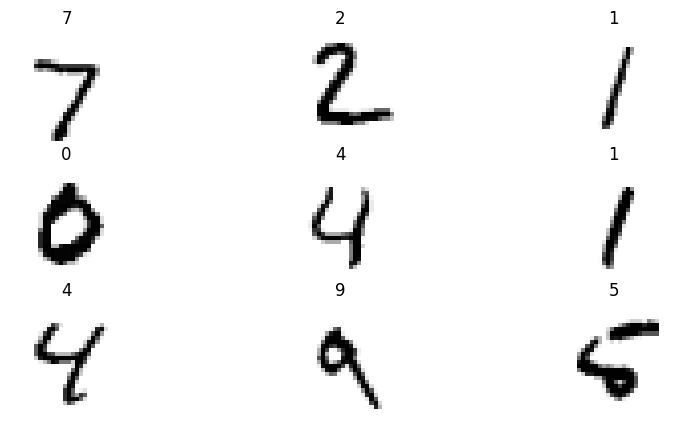

In [8]:
plt.figure(figsize=(10,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    #img=imread(x_test)
    plt.imshow(x_test[i], cmap='binary')
    plt.title(y_test[i])
    plt.axis('off')

Reshape the data

In [9]:
#x_train=x_train.reshape(x_train.shape[0], -1)
x_train=x_train.reshape(-1,28*28)

In [10]:
#x_test=data['x_test'].reshape(data['x_test'].shape[0], -1)
x_test=x_test.reshape(-1,28*28)

In [11]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

Set the paramaters of your models and train the model

Supervised Classification

Random Forest Classifier

In [15]:
clf=RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, data['y_train'])

RandomForestClassifier(random_state=42)

Try to predict your test data and check the accuracy

In [16]:
y_pred=clf.predict(x_test)

In [20]:
accuracy=accuracy_score(y_test, y_pred)
str(accuracy*100)+'%'

'97.05%'

SVM

In [32]:
from sklearn.svm import SVC

In [33]:
clf=SVC()
clf.fit(x_train, y_train)

SVC()

In [34]:
y_pred=clf.predict(x_test)

In [36]:
accuracy=accuracy_score(y_test, y_pred)

In [37]:
accuracy*100

97.92

Unsupervised Classification

KNeigbors

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [59]:
Knn=KNeighborsClassifier()
Knn.fit(x_train, y_train)

KNeighborsClassifier()

In [60]:
y_pred=Knn.predict(x_test)

In [ ]:
knn_accuracy

In [13]:
pca_std=StandardScaler().fit_transform(x_train[:3000].reshape(-1, 28*28))

pca=PCA(n_components=2)
x_2=pca.fit(pca_std).transform(pca_std)

In [14]:
import plotly.graph_objs as go
import plotly.offline as py
pca_std = StandardScaler().fit_transform(x_train[:3000].reshape(-1, 28*28))
# Call the PCA method with 2 components.
pca = PCA(n_components=2)
x_2 = pca.fit(pca_std).transform(pca_std)
data = [go.Scatter(
x = x_2[:,0],
y = x_2[:,1],
mode = 'markers',
showlegend = False,
marker = dict(
size = 8,
color = y_train,
colorscale ='Rainbow',
showscale = False,
line = dict(
width = 2,
color = 'rgb(255, 255, 255)')
,
opacity = 0.8
)
)]
layout = go.Layout(
title= 'Principal Component Analysis (PCA)',
hovermode= 'closest',
xaxis= dict(
title= 'First Principal Component',
ticklen= 8,
zeroline= False,
gridwidth= 2,
),
yaxis=dict(
title= 'Second Principal Component',
ticklen= 8,
gridwidth= 2,
),
showlegend= True
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='PCA_plot')


In [15]:
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.cluster import KMeans
# Set a KMeans clustering with 10 components cuz there are 10 class
#labels
kmeans = KMeans(n_clusters=10)
# Compute cluster centers and predict cluster indices
kmeans_10 = kmeans.fit_predict(x_2)
data = [
go.Scatter(
x= x_2[:, 0],
y= x_2[:, 1],
mode="markers",
showlegend=False,
marker=dict(
size=8,
color = kmeans_10,
colorscale = 'Rainbow',
showscale=False,
line = dict(
width = 2,
color = 'rgb(255, 255, 255)'
)))]
layout = go.Layout(
title= 'KMeans Clustering',
hovermode= 'closest',
xaxis= dict(
title= 'First Principal Component',
ticklen= 8,
zeroline= False,
gridwidth= 2,
),
yaxis=dict(
title= 'Second Principal Component',
ticklen= 8,
gridwidth= 2,
),
showlegend= True
)
fig = dict(data = data, layout = layout)
py.iplot(fig, filename="kmeans_plot")

In [44]:
x_test[9:10].shape

(1, 784)

Predicted Label: 3
True Label: [3]


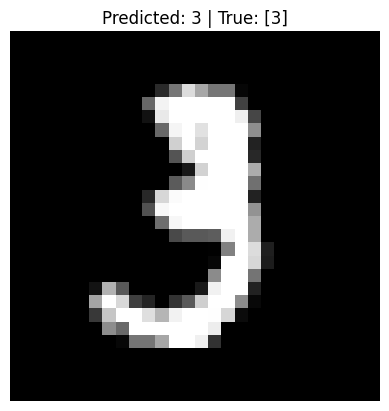

In [57]:
# Function to preprocess the image (flattening, etc.)
def preprocess_image(image):
    return image.flatten().reshape(-1, 28*28)  # Flatten and reshape for prediction

# Select a sample image from the test set
sample_image = x_train[10:11]  # Select the first image from the test set
sample_label = y_train[10:11] # True label of the sample image

# Preprocess the image
preprocessed_image = preprocess_image(sample_image)

# Predict the label
predicted_label = clf.predict(preprocessed_image)
n=[]
n.append(predicted_label)
print(f"Predicted Label: {predicted_label[0]}")
print(f"True Label: {sample_label}")

# Display the image
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label[0]} | True: {sample_label}")
plt.axis('off')
plt.show()

In [58]:
n

[array([3], dtype=uint8)]